## Geometries Exercise

Laurent wants to buy a house in Sierre. He went to visit 3 properties and he collected the coordinates in this file: data/simple-geometries/exercise-geometries.txt

### 1. Read the text file

In [1]:
f = open ('../../data/simple-geometries/geometries.json') 

We can open the file using the regular python `open` function. 

### 2. Explore the file contents

The file contains coordinates of: terrains, houses, swimming pool, river, road, university and train station.

You will notice that the file contains data in JSON format. You'll need to explore the context ot understand what is in it and where is the information that you need. 

In [2]:
data = f.read()
f.close()
data

'{\n  "type": "FeatureCollection",\n  "features": [\n    {\n      "type": "Feature",\n      "properties": {\n        "stroke": "#555555",\n        "stroke-width": 2,\n        "stroke-opacity": 1,\n        "fill": "#555555",\n        "fill-opacity": 0.5,\n        "type": "terrain",\n        "name": "Terrain-A"\n      },\n      "geometry": {\n        "type": "Polygon",\n        "coordinates": [\n          [\n            [\n              7.535770833492279,\n              46.29209752598038\n            ],\n            [\n              7.535832524299621,\n              46.29196223064501\n            ],\n            [\n              7.536106109619141,\n              46.29214756663618\n            ],\n            [\n              7.5359907746315,\n              46.29223652768917\n            ],\n            [\n              7.535816431045532,\n              46.29220872737563\n            ],\n            [\n              7.535770833492279,\n              46.29209752598038\n            ]\n     

Geometries are usually easier to understand visually. You could use a tool like [http://geojson.io](http://geojson.io) (click ant test it!) to visualize the contents of this file


Luckily Python has a helpful JSON library that will help you with this task:

In [ ]:
import json

### 3. Create geometries for each type of object in the file

`Polygon` for terrains,houses, pool. 
`LineString` for river, road, 
`Point` for station and university. 
You will notice, for example, that the train station only has one pair of x, y coordinates, so it's a point. A house, you will notice, has more coordinates, and it's a polygon. 

In [5]:
f = open ('../../data/simple-geometries/geometries.json')  
data = f.read()
f.close()

import json
from types import SimpleNamespace

geojson=json.loads(data, object_hook=lambda d: SimpleNamespace(**d))
geojson.features

geojson.features[0].geometry

namespace(type='Polygon',
          coordinates=[[[7.535770833492279, 46.29209752598038],
                        [7.535832524299621, 46.29196223064501],
                        [7.536106109619141, 46.29214756663618],
                        [7.5359907746315, 46.29223652768917],
                        [7.535816431045532, 46.29220872737563],
                        [7.535770833492279, 46.29209752598038]]])

In [7]:
from shapely.geometry import Polygon
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import GeometryCollection


In [23]:
geojson.features[7].properties.type

'university'

In [24]:
geojson.features[7].geometry

namespace(type='Point', coordinates=[7.536114156246185, 46.29274434426655])

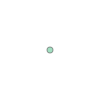

In [26]:
uni = Point(geojson.features[7].geometry.coordinates)
list(uni.coords)
uni

In [ ]:
features = geojson.features
for f in features:
    print(f.geometry.coordinates)
    if f.geometry.type == 'Point' :
        f.geo=Point(f.geometry.coordinates)
    elif f.geometry.type == 'LineString' :
        f.geo=LineString(f.geometry.coordinates)
    elif f.geometry.type == 'Polygon' :
        #print("coco",f.geometry.coordinates)
        f.geo=Polygon(f.geometry.coordinates[0])

In [ ]:
houses = [g for g in features if g.properties.type=='house'] 
houses

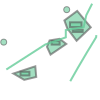

In [28]:
onlygeometries=GeometryCollection([g.geo for g in features])
onlygeometries

### 4. Which is the largest house? H1, H2, H3?

Now that all objects are structured and in a list, it will be easier to operate over them. To answer this question we need to first filter only the houses.

In [31]:
houses = [g for g in features if g.properties.type=='house'] 


Then try to compare the areas of the houses and keep the largest. In the end you can print the `name` of the largest house. 

In [32]:
maxi=0
for h in houses:
    if h.geo.area>maxi:
        maxi=h.geo.area
        bigger=h
        
bigger.properties.name

'House-3'

In [33]:
bigHouse = max(houses,key=lambda h:h.geo.area )
bigHouse.properties.name

'House-3'

### 5. Which house is contained in which terrain?

First filter the terrains.

In [34]:
terrains = [g for g in features if g.properties.type=='terrain'] 

Hint: iterate over the terrains and also the houses, and compare if the house is `within` the terrain.

In [35]:
match={}
for t in terrains:
    for h in houses:
        if h.geo.within(t.geo):
            match[t.properties.name]=h.properties.name

match

{'Terrain-A': 'House-1', 'Terrain-B': 'House-3', 'Terrain-C': 'House-2'}

### 6. Which terrain is closer to the road? and to the university?

First get the road, and university. 

In [66]:
roads=filter(lambda r:r.properties.type=='road' ,features)
road=next(roads)

unis=filter(lambda r:r.properties.type=='university' ,features)
uni=next(unis)

Now iterate over the terrains, and compute the distance to the road. Keep only the minimum.

In [67]:
minDist=100000
for t in terrains:
    dist=t.geo.distance(road.geo)
    if dist<minDist :
        minDist=dist
        closer=t

closer.properties.name

'Terrain-B'

Do the same for the university

In [68]:
minDist=100000
for t in terrains:
    dist=t.geo.distance(uni.geo)
    if dist<minDist :
        minDist=dist
        closer=t

closer.properties.name

'Terrain-B'

### 7. The subterranean river crosses some terrains. Which ones?

First get the river

In [69]:
rivers=filter(lambda r:r.properties.type=='river' ,features)
river=next(rivers)

Now iterate over the terrains and see which ones intersect with the river.

In [70]:
for t in terrains:
    if t.geo.intersects(river.geo):
        print(t.properties.name)

Terrain-A
Terrain-B


### 8. Which terrain has a swimming pool?

Similar as the previous one, but now check if the terrain contains the pool

In [71]:
pools=filter(lambda r:r.properties.type=='pool' ,features)
pool=list(pools)[0]

for t in terrains:
    if t.geo.contains(pool.geo):
        print(t.properties.name)

Terrain-B


### 9. Using the terrain form question (8), create a new polygon with the same surface but without the house and swimming pool

For this first get the terrain that contains the pool, and its house:

In [72]:
terrainB=list(filter(lambda r:r.properties.name=='Terrain-B',terrains))[0]
house3=list(filter(lambda r:r.properties.name=='House-3',houses))[0]

Then, create the new terrain, computing the difference:

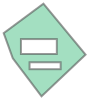

In [73]:
newTerrain=terrainB.geo.difference(house3.geo)
newTerrain=newTerrain.difference(pool.geo)

newTerrain

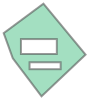

In [65]:

toto = Polygon(terrainB.geo.exterior.coords,[pool.geo.exterior.coords,house3.geo.exterior.coords])
toto

### 10. Compute the area of a terrain (any of them). Is it correct? How about the area of a house?

Can just use the area attribute.

In [74]:
terrainB.geo.area

house3.geo.area 

1.6777327122259985e-08